# Relación de los patrones SOLID y los principios de programación orientada a objetos
<a href="https://juanfonsecasolis.github.io/">Juan M. Fonseca-Solís</a> · March/April 2025 · 10 min read

---

## Introducción
En metodologías de trabajo incrementales, el equipo de desarrollo de software incorpora funcionalidad nueva al sistema de forma acumulativa (cada dos semanas, por ejemplo) que posteriormente el equipo de pruebas y el cliente evaluan para determinar si los requerimientos fueron satisfechos correctamente. Durante este proceso, los cambios realizados pueden afectar la funcionalidad pre-existente, por lo que es necesario correr pruebas de regresión, es decir, repetir las pruebas creadas en iteraciones pasadas. Como la ejecución de estas pruebas resulta costozo, se recurre a la automatización; sin embargo, puede ocurrir también que los scripts de automatización dejen de funcionar; entre otras razones, por un mal diseño arquitectónico de los mismos. Para evitar esto se utilizan cuatro principios de diseño resumidos en el acrónimo "SOLID" que, favoreciendo una alta cohesión y un bajo acoplamiento entre los componentes (GRASP), facilitan el mantenimiento y escalabilidad de la solución de pruebas [1, 2]:

* S - Responsabilidad única (_single responsibility_).
* O - Abierto-cerrado (_Open-closed_).
* L - Sustitución de Liskov (_Liskov substitution_).
* I - Segregación de la interfaz (_Interface segregation_).
* D - Inversión de la dependencia (_Dependency inversion_).

Estos cuatro principios de diseño ya son ampliamente explicados en la literatura y en este ipython notebook no pretendemos hacer lo mismo, sino que más bien nos enfocamos en describir su relación con los cuatro principios básicos de programación orientada a objetos (OOP, por sus siglas en inglés): polimorfismo, abstracción, encapsulamiento y herencia; pues ambos conceptos suelen confundirse.

## Responsabilidad única (encapsulamiento)
En este principio, cada componente de software (clase o método) desempeña o "encapsula" una sola tarea, lo que permite reemplazarlo sin tener que modificar otros archivos de código. Este principio también se relaciona con el OOP de _segregación de la interfaz_, que explicamos más adelante. Abajo, por ejemplo, definimos una clase "Funcion" cuya única tarea es evaluar elementos del dominio y, por aparte, una clase "Graficador" encargado de dibujar funciones:

In [54]:
from abc import ABC, abstractmethod

class Funcion(ABC):
    
    def __init__(self):
        pass
    
    @abstractmethod
    def evaluar(self, x:float) -> float:
        pass
    
    def evaluarArreglo(self, xs:list) -> list:
        return [self.evaluar(x) for x in xs]

class Graficador(ABC):
    
    def __init__(self, leyenda:str, etiquetaX:str, etiquetaY:str):
        self.leyenda = leyenda
        self.etiquetaX = etiquetaX
        self.etiquetaY = etiquetaY
        pass
    
    def graficar(self, arregloX:list, arregloY:list, ) -> None:
        plt.plot(arregloX, arregloY, label=self.leyenda)
        plt.xlabel(self.etiquetaX)
        plt.ylabel(self.etiquetaY)
        plt.legend()

## Abierto-cerrado (polimorfismo)
En el principio abierto-cerrado los componente de software están abiertos para extender su funcionalidad pero cerrados para su modificarla; esto se cumple en el principio OOP de _polimorfismo_, donde la funcionalidad de las clases padre (por ejemplo, TestBase o PageBase) se escribe una sola vez y son las clases hijas las encargadas de agregar  funcionalidad nueva, como atributos y métodos adicionales o la implementación de métodos abstractos. A continuación, por ejemplo, definimos dos clases hijas "FuncionLineal" y "FuncionCuadratica" que implementan la funcionalidad de la clase padre "Funcion": 

In [55]:
class FuncionLineal(Funcion):
    
    def __init__(self, m:float, b:float):
        super()
        self.m = m
        self.b = b
    
    def evaluar(self, x:float) -> float:
        return self.m*x+self.b
    
class FuncionCuadratica(Funcion):
    
    def __init__(self, a:float, b:float, c:float):
        super()
        self.a = a
        self.b = b
        self.c = c
    
    def evaluar(self, x:float) -> float:
        return self.a*x**2+self.b*x+self.c

## Sustitución de Liskov (herencia)
En este principio los atributos y métodos de la clase padre también están presentes en sus clases hijas, y pueden ser invocados sin necesidad de realizar conversión explícita de datos (_casting_, en inglés); lo que se relaciona al principio OOP de _herencia_. Abajo, por ejemplo, creamos dos instancias de las clases hijas de "Funcion" e invocamos el método "evaluarArreglo", definido solo en la clase padre. 

In [56]:
funcionLineal = FuncionLineal(1, 0)
funcionCuadratica = FuncionCuadratica(1, 2, 3)
x = [0, 0.5, 1.0, 2.0, 4.0]

print(funcionLineal.evaluarArreglo(x))
print(funcionCuadratica.evaluarArreglo(x))

[0, 0.5, 1.0, 2.0, 4.0]
[3, 4.25, 6.0, 11.0, 27.0]


## Segregación de la interfaz (encapsulamiento)

En el principio de segregación de la interfaz los componentes implementan roles documentados o "encapsulados" en una interfaz (por ejemplo, ejecutar operaciones de lectura, escritura y borrado en un repositorio). Es mejor tener "muchas interfaces de cliente específicas que una interfaz de propósito general". A continuación, por ejemplo, definimos una nueva clase hija llamada "FuncionSeno" con la cual, abusando del principio de responsabilidad única para efectos didácticos, podemos graficar en pantalla: 

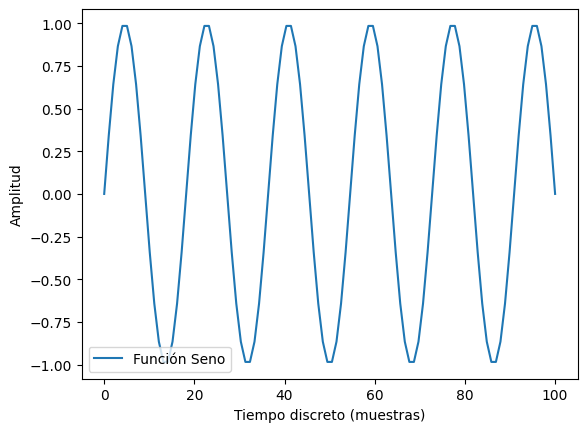

In [57]:
import matplotlib.pylab as plt
import numpy as np

# en Python no existen las interfaces, pero se pueden emular usando herencia múltiple
class FuncionSeno(Funcion, Graficador):
    
    def __init__(self, Fs:float, F0:float):
        super()
        self.Fs = Fs
        self.F0 = F0
        self.leyenda = 'Función Seno'
        self.etiquetaX = 'Tiempo discreto (muestras)'
        self.etiquetaY = 'Amplitud'
        
    def evaluar(self, x:float) -> float:
        return np.sin(2*np.pi*self.F0/self.Fs*x)
    
funcionSeno = FuncionSeno(Fs=8000, F0=440)
x = np.linspace(0,100,100)
funcionSeno.graficar(x, funcionSeno.evaluarArreglo(x))

##  Inversión de la dependencia (abstracción)
Este principio propone que "se debe depender de abstracciones, no de implementaciones", es decir, que primero se diseña la firma del método (parámetros, valores de retorno y función) en el componente subordinado y luego se piensa en su implementación. Abajo, por ejemplo, definimos la clase "Reproductor" y la implementación que debe cumplir el método "reproducirAudio":

In [59]:
# funcionSeno.reproducirAudio(funcionSeno.Fs, funcionSeno.evaluarArreglo(x))

class Reproductor(ABC):
    
    def __init__(self):
        pass
    
    def reproducirAudio(self, Fs:int, xs:list) -> None:
        '''
            Reproduce el audio recibido mediante las funciones IPython.display.Audio y la función Audio(y, rate=Fs). 
        
            Parámetros:
            - Fs: frecuencia de muestreo (en hercios).
            - xs: el arreglo con los datos a reproducir.

            Retorno:
            - None (se reproduce el audio automáticamente).
        '''
        pass

## Conclusiones
Los principios de diseño resumidos en el acrónimo SOLID se relacionan con los principios de programación orientada a objetos OOP. Responsabilidad-única y segregación de la interfaz se relacionan al principio de encapsulamiento, pues las funciones se encapsulan en clases e interfaces. El principio abierto-cerrado se relaciona con el de polimorfismo, pues son las clases hijas las que extienden la funcionalidad de las clases padres. El principio de sustitución de Liskov está ligado al de herencia, pues la clase hija hereda de la clase padre y puede usar los mismos atributos y métodos. Finalmente, el principio de inversión de la dependencia se relaciona al principio de abstracción, pues primero se piensa en la función que debe desempeñar un componente subordinado y luego en la implementación para lograrlo.

## Referencias
1. SOLID. (2024, 9 de enero). Wikipedia, La enciclopedia libre. Fecha de consulta: 13:10, enero 9, 2024 desde https://es.wikipedia.org/w/index.php?title=SOLID&oldid=156873545.
2. GRASP. (2024, 7 de diciembre). Wikipedia, La enciclopedia libre. Fecha de consulta: 15:17, diciembre 7, 2024 desde https://es.wikipedia.org/w/index.php?title=GRASP&oldid=163990059.
3. Anton Angelov. Automated Testing Unleashed : Automated Testing Engineering Fundamentals: The Complete Handbook Volume 1. Automate the Planet.

---
<a rel="license" href="http://creativecommons.org/licenses/by-nd/4.0/"><img alt="licencia Creative Commons" style="border-width:0" src="../img/80x15_by-nd.png" /></a><p style="text-align: center;"> This work is under a <a rel="license" href="http://creativecommons.org/licenses/by-nd/4.0/">Creative Commons Atribución 4.0 Internacional license</a>. The website <a href="https://juanfonsecasolis.github.io/">juanfonsecasolis.github.io</a> It is a Costa Rican blog dedicated to independent research on issues related to my computer science and math. To reuse this article and cite the source you can use Bibtex:</p>
```
@online{Fonseca2025,
  author = {Juan M. Fonseca-Solís},
  title = { Principios SOLID },
  year = 2025,
  url = {https://juanfonsecasolis.github.io/blog/JFonseca.solid.html},
  urldate = {}
}
```